<a href="https://colab.research.google.com/github/PoorneshShiva/Deep-learning-assigments/blob/main/New%20PRep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Downloading

In [ ]:
import zipfile
import requests
import os
import shutil
from pathlib import Path
import glob

def download_data_and_extract(
                link:str = "",
                output_name:str = "animal.zip",
                extracted_dir:str = "temp"
                ):
    """ Download and extract the link to the output name.

    Arguments:
      - link: Link to download the data
      - output_name: the file name to save the data
      - extracted_dir: the directory to extract the data
    Returns:
      - bool: If the data was downloaded and extracted

    """
    try:
        response = requests.get(link, stream=True)
    except requests.exceptions.RequestException as oops:
        print(f"Error downloading the data: {oops}")
        return False

    if response.status_code != 200:
        message = "Failed to download the data. Status code: "
        message += response.status_code
        print(message)
        return False

    try:
        with open(output_name, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
    except Exception as oops:
        print(f"Error saving the data: {oops}")
        return False

    try:
        with zipfile.ZipFile(output_name, 'r') as zip_ref:
            zip_ref.extractall(extracted_dir)
    except Exception as oops:
        print(f"Error extracting the data: {oops}")
        return False

    print(f"Data downloaded and extracted to 'temp' directory.")
    return True


def create_structure_image_dataset(folder_path:str = "temp",
                                   features:list = ["cats", "dogs"],
                                   output_dir:str = "data",
                                   image_folder = "train"
                                   ):
    """ Create a structure for the image dataset.

    Arguments:
      - folder_path: a path of the folder
       - features: a list of features
    Returns:
      - bool: If the structure was created
    """
    try:
        for feature in features:
            destination_path = f"{output_dir}/{feature}"
            destination_path = Path(destination_path)
            destination_path.mkdir(parents=True, exist_ok=True)
            source_pattern = f"{folder_path}/{feature[:-1]}*"

            if image_folder != "":
              source_pattern = f"{folder_path}/{image_folder}/{feature[:-1]}*"

            for file in glob.glob(source_pattern):
                shutil.copy(file, destination_path)
            print(f"Structure created for {feature}")

        return True
    except Exception as oops:
        print(f"Error creating the structure: {oops}")
        return False


In [ ]:
# Data Preprocessing

In [ ]:

from PIL import Image

def count_on_images(features:list = ["cats", "dogs"],
                    dataset_folder:str = 'data'):
    """ Count the images for all the features given

    Arguments:
      - folder_path: a path of the folder
       - features: a list of features
    Returns:
      - image_paths: A list of image paths
    """
    for feature in features:
        image_paths = list(Path(f'{dataset_folder}/{feature}').resolve().iterdir())
        f_count = len(image_paths)
        print(f"{feature}_count: {f_count}")
        yield image_paths

def get_image_dimensions(image_path):
    """
    Get the width and height of an image.

    Arguments:
      - image_path: Path to the image file.

    Returns:
      - tuple: (width, height) of the image.
    """
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except Exception as oops:
        print(f"Error reading image dimensions: {oops}")
        return None


In [ ]:
## Optional data from pickle
def load_dataset_from_pickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return tf.data.Dataset.from_tensor_slices(data)

# train_ds_loaded = load_dataset_from_pickle('train_ds.pkl')


In [ ]:
# Important confusion matrix

import numpy as np
import tensorflow as tf


def convert_dataset_to_numpy(
                        dataset:tf.data.Dataset
                        ):
    """ Load and preprocess the dataset.

    Arguments:
      - dataset: A tensorflow dataset
    Returns:
      - images: A numpy array of the images
      - labels: A numpy array of thtensorflowe labels

    """
    images = []
    labels = []

    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())

    images_np = np.concatenate(images, axis=0)
    labels_np = np.concatenate(labels, axis=0)

    return images_np, labels_np

In [ ]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
dataset_folder = "data"
### Important
(train_ds, val_ds) = tf.keras.utils.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

train_num_batches = val_ds.cardinality()
print(f"The num_batches in Train dataset {train_num_batches}")

val_num_batches = val_ds.cardinality()
print(f"The num_batches in validation dataset {val_num_batches}")

class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.
The num_batches in Train dataset 313
The num_batches in validation dataset 313
['cats', 'dogs']


In [ ]:
link="https://storage.googleapis.com/adsa-data/animal-classification/animal.zip"
output_name="./animal.zip"
extracted_dir = "temp"
features = ["cats", "dogs"]
dataset_folder = "data"

if download_data_and_extract(link,
                          output_name,
                          extracted_dir):
    create_structure_image_dataset(extracted_dir,
                                   features,
                                   dataset_folder,
                                   "train")
    image_feature_paths = list(count_on_images())
    print(image_feature_paths[0][0])

# ## Optional Check the images sizes

# image_path = image_feature_paths[0]
# for image_path in image_feature_paths:
#     image_width, image_height = get_image_dimensions(image_path)
#     print(f"Image dimensions are: Width = {image_width} px, Height = {image_height} px")

Data downloaded and extracted to 'temp' directory.
Structure created for cats
Structure created for dogs
cats_count: 12500
dogs_count: 12500
/content/data/cats/cat.966.jpg


In [ ]:
!mkdir /content/


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
import tensorflow as tf


MODEL_IMAGE_SIZES = {
    "ResNet50": (224, 224),
    "EfficientNetB0": (224, 224), # More Accuracy, Less Computation # Flexible Depth
    "EfficientNetB1": (240, 240), # More Accuracy, Less Computation # Flexible Depth
    "EfficientNetB2": (260, 260), #  More Accuracy, Less Computation # Flexible Depth
    "EfficientNetB7": (600, 600),
    "MobileNet": (224, 224),
    "MobileNetV2": (224, 224),
    "MobileNetV3_Small": (224, 224),
    "MobileNetV3_Large": (224, 224),
    "InceptionV3": (299, 299),
    "DenseNet121": (224, 224), # More Accuracy, More Efficenty, # Very Deep Depth
    "VGG16": (224, 224), #
    "VGG19": (224, 224),
    "InceptionResNetV2": (299, 299),
    "Xception": (299, 299),
}


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

### Important
(train_ds, val_ds) = tf.keras.utils.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

train_num_batches = val_ds.cardinality()
print(f"The num_batches in Train dataset {train_num_batches}")

val_num_batches = val_ds.cardinality()
print(f"The num_batches in validation dataset {val_num_batches}")

class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.
The num_batches in Train dataset 157
The num_batches in validation dataset 157
['cats', 'dogs']


In [ ]:
model_vgg16 = tf.keras.applications.VGG16(weights='imagenet')
IMAGE_SIZE_WIDTH, IMAGE_SIZE_HEIGHT = model_vgg16.input_shape[1:3]
print(f"VGG16 IMAGE_SIZE: {IMAGE_SIZE_WIDTH} {IMAGE_SIZE_HEIGHT}")

VGG16 IMAGE_SIZE: 224 224


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)

class Visulization:

    def __init__(self,
                 model:str = None,
                 class_names:list = ["cats", "dogs"],
                 figsize=(10, 10)
                 ):
        self.plt = plt
        self.plt.figure(figsize=figsize)
        self.model = model
        self.class_names = class_names

    def plot_dataset_images(self,
                    tf_dataset,
                    num_images=9,
                    ):
        """ Plot the images from the dataset.

        Arguments:
          - tf_dataset: A tensorflow dataset
          - num_images: The number of images to plot
            It should be less than the batch size
        Returns:
          - None

        """

        try:
          for images, labels in tf_dataset.take(1):
              for i in range(num_images):
                  ax = self.plt.subplot(4, 4, i + 1)
                  self.plt.imshow(images[i].numpy().astype("uint8"))
                  self.plt.title(class_names[labels[i]])
                  self.plt.axis("off")

          self.plt.show()
        except Exception as oops:
          print(f"Error plotting the images: {oops}")

    def plot_loss_accuracy(self, history):
        """ Plot the loss and accuracy of the model.

        Arguments:
          - history: The history of the model
        Returns:
          - None

        """
        self.plt.subplot(1, 2, 1)
        self.plt.plot(history.history['loss'], label='Training Loss')
        self.plt.plot(history.history['val_loss'], label='Validation Loss')
        self.plt.title('Loss Over Epochs')
        self.plt.xlabel('Epochs')
        self.plt.ylabel('Loss')
        self.plt.legend()

        # Plot Accuracy
        self.plt.subplot(1, 2, 2)
        self.plt.plot(history.history['accuracy'], label='Training Accuracy')
        self.plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        self.plt.title('Accuracy Over Epochs')
        self.plt.xlabel('Epochs')
        self.plt.ylabel('Accuracy')
        self.plt.legend()

        self.plt.tight_layout()
        self.plt.show()


    def plot_confusion_matrix_from_model(self,
                                         predictions,
                                         test_images,
                                         test_labels,
                                         classes):
        """ Plot the confusion matrix from the model.

        Arguments:
          - model: The model to use
          - test_images: The test images
          - test_labels: The test labels
        Returns:
          - None

      """
        # Create confusion matrix and normalizes it over predicted (columns)
        cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

        # Plot
        cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
        fig, ax = plt.subplots(figsize=(10,10))
        cmd.plot(ax=ax)

    def plot_confusion_matrix(self,
                              prediction,
                              test_labels
                              ):

      print(classification_report(test_labels, predictions.argmax(axis=1)))


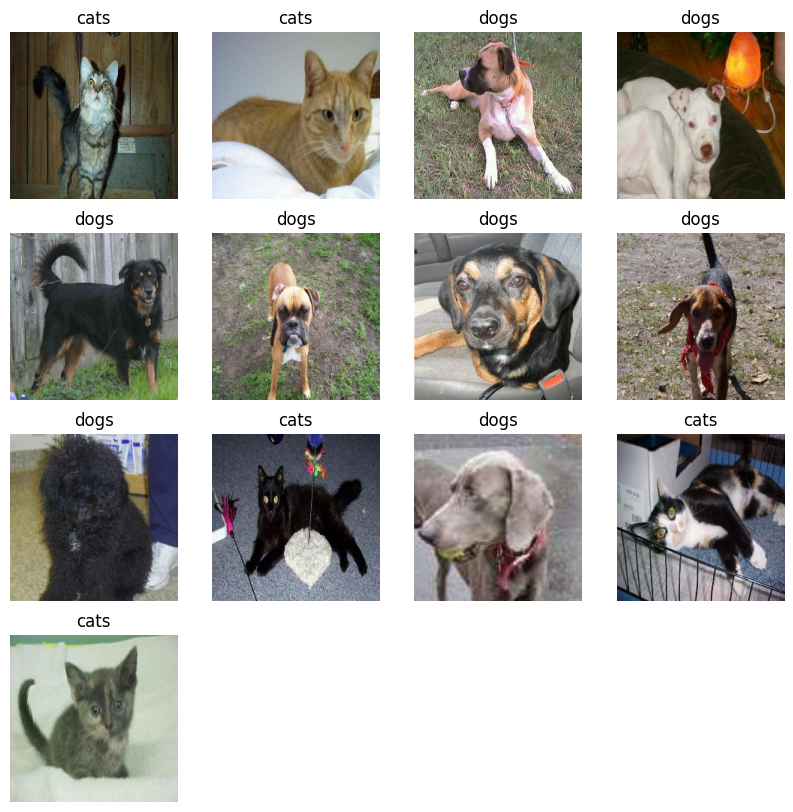

In [ ]:
viz = Visulization()
viz.plot_dataset_images(val_ds, 13)

In [ ]:
import numpy as np
import tensorflow as tf


def convert_dataset_to_numpy(
                        dataset:tf.data.Dataset
                        ):
    """ Load and preprocess the dataset.

    Arguments:
      - dataset: A tensorflow dataset
    Returns:
      - images: A numpy array of the images
      - labels: A numpy array of the labels

    """
    images = []
    labels = []

    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())

    images_np = np.concatenate(images, axis=0)
    labels_np = np.concatenate(labels, axis=0)

    return images_np, labels_np

## Confusion Matrix from tf.data.dataset

In [ ]:
predictions = model.predict(val_ds)
test_images, test_labels = convert_dataset_to_numpy(val_ds)
viz.plot_confusion_matrix_from_model(predictions, test_images, test_labels, class_names)

NameError: name 'model' is not defined

In [ ]:
## Confusion Matrix from np_array

In [ ]:
predictions = model.predict(val_ds)
viz.plot_confusion_matrix_from_model(predictions, test_images, test_labels, class_names)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

# Onlin Image Validation

In [ ]:
## Flatten the image
def reshape(images):
    images = images.reshape(images.shape[0], -1)
    return images


In [ ]:
import tensorflow as tf
import numpy as np

def predict_image_with_dataset(image_path,
                               model,
                               target_size=(224, 224)):
    """
    Predicts the class of an image using a TensorFlow model trained with image_dataset_from_directory.

    Argument:
        image_path: Path to the image file.
        model_path :Tensorflow mode
        target_size: Target size to resize the image (default: (224, 224)).

    Returns:
      tuple: (predicted_class_index, predicted_percentage)
    """

    img = tf.keras.utils.load_img(image_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_probability = predictions[0][predicted_class_index]

    predicted_percentage = predicted_probability * 100

    return predicted_class_index, predicted_percentage




In [ ]:

import tensorflow as tf
from tensorflow import keras
from tf.keras.applications import EfficientNetB7
from tf.keras.models import Sequential
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

base = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
)


model = Sequential(
    [
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


# Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input,
                                     Dense,
                                     Dropout,
                                     Conv2D,
                                     MaxPool2D,
                                     Flatten,
                                     GlobalAveragePooling2D
                                    )
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1


# Clean the GPU memory

In [ ]:
from tensorflow.keras.backend import clear_session
tf.compat.v1.reset_default_graph()
clear_session()



In [ ]:


IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

base = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
)

model = Sequential(
    [base,
     GlobalAveragePooling2D(),
     Dropout(0.2),
     Dense(2, activation="softmax"),
    ]
)

base.trainable = False


for layer in model.layers:
    print(layer.name, ' ', layer.trainable)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

model.summary()

efficientnetb7   False
global_average_pooling2d_7   True
dropout_1   True
dense_6   True


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)          │ (None, 7, 7, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │           5,122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,102,809 (244.53 MB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [ ]:
model.fit(x=train_ds,validation_data=val_ds,epochs=1)

 256/1250 ━━━━━━━━━━━━━━━━━━━━ 2:12:20 8s/step - accuracy: 0.9379 - loss: 0.1664

KeyboardInterrupt: 

# Data Agumentation

In [ ]:
from tensorflow.keras.layers import (Rescaling,
                                     RandomZoom,
                                     RandomFlip,
                                     RandomRotation,
                                     RandomTranslation
                                    )
from tensorflow.keras.models import Sequential

data_agumentation_model = Sequential(
    [

    Rescaling(1./255)
    RandomZoom(height_factor=0.2, width_factor=0.2)

    RandomFlip(mode="horizontal_and_vertical")
    RandomRotation(0.2)
    RandomTranslation(height_factor=0.2, width_factor=0.2)
    ]
)


# Best Conv Layer

In [ ]:
from tensorflow.keras.layers import (Conv2D,
                                   InputLayer,
                                   MaxPool2D,
                                   SpatialDropout2D,
                                   Flatten,
                                   Dropout,
                                    Dense)
from tensorflow.keras import Sequential

In [ ]:
model = Sequential([
    InputLayer((32,32, 3)),
    Conv2D(32,  kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(8, 2, padding='same'),
    SpatialDropout2D(0.2),

    Conv2D(64, kernel_size=(4, 4), padding='same', activation='relu'),
    MaxPool2D(6, 2),
    SpatialDropout2D(0.2),

    Conv2D(128, kernel_size=(5, 5),  padding='same', activation='relu'),
    MaxPool2D(3, 2),
    SpatialDropout2D(0.2),

    Conv2D(256, kernel_size=(6, 6), padding='same', activation='relu'),
    MaxPool2D(2, 2),
    SpatialDropout2D(0.2),

    Flatten(),
    Dense(512, "relu"),
    Dropout(0.1),
    Dense(256, "relu"),
    Dropout(0.1),

    Dense(128, "relu"),
    Dropout(0.1),
    Dense(10, activation='softmax'),
    ])

model.summary()
optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])